In [1]:
!pip install citipy

In [2]:
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd

In [3]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [4]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [5]:
import requests as req
import json

In [6]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [7]:
samplecity

,city,country
2246,bechem,gh
6559,de-kastri,ru
5186,helong,cn
7376,tobolsk,ru
1943,marsabit,ke
2497,tokonou,gn
1780,braganca,br
5921,manzhouli,cn
1614,mangai,cd
384,casino,au


In [8]:
apikey = '9e861b2a772ee55acbe86461ecea57cf'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")


This is city#: 1
This is: bechem
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=bechem
This is city#: 2
This is: de-kastri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=de-kastri
This is city#: 3
This is: helong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=helong
This is city#: 4
This is: tobolsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=tobolsk
This is city#: 5
This is: marsabit
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=marsabit
This is city#: 6
This is: tokonou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461

This is city#: 48
This is: garissa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=garissa
This is city#: 49
This is: uglegorsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=uglegorsk
This is city#: 50
This is: goianesia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=goianesia
No data for this city: pinotepa nacional
This is city#: 51
This is: pinotepa nacional
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=pinotepa nacional
This is city#: 52
This is: dengzhou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=dengzhou
This is city#: 53
This is: tshane
This is the requested URL: htt

This is city#: 94
This is: pteleos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=pteleos
This is city#: 95
This is: matam
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=matam
No data for this city: abu jubayhah
This is city#: 96
This is: abu jubayhah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=abu jubayhah
This is city#: 97
This is: pala
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=pala
This is city#: 98
This is: voyvozh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=voyvozh
This is city#: 99
This is: krasnovka
This is the requested URL: http://api.openweathermap.org/data/

This is city#: 139
This is: sabla
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=sabla
This is city#: 140
This is: jatibarang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=jatibarang
This is city#: 141
This is: aliaga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=aliaga
This is city#: 142
This is: sarwar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=sarwar
This is city#: 143
This is: consett
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=consett
This is city#: 144
This is: flagstaff
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee5

This is city#: 186
This is: mishkino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=mishkino
This is city#: 187
This is: muravlenko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=muravlenko
This is city#: 188
This is: nanning
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=nanning
This is city#: 189
This is: mahajanga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=mahajanga
This is city#: 190
This is: moissac
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=moissac
This is city#: 191
This is: lumberton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=

This is city#: 233
This is: malyye derbety
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=malyye derbety
This is city#: 234
This is: severo-kurilsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=severo-kurilsk
This is city#: 235
This is: victoria falls
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=victoria falls
This is city#: 236
This is: raduzhnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=raduzhnyy
No data for this city: tambopata
This is city#: 237
This is: tambopata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=tambopata
This is city#: 238
This is: port-gentil
This is

This is city#: 278
This is: hazleton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=hazleton
This is city#: 279
This is: smidovich
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=smidovich
This is city#: 280
This is: bhuban
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=bhuban
This is city#: 281
This is: aksarayskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=aksarayskiy
This is city#: 282
This is: sokol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=sokol
This is city#: 283
This is: mingyue
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b

This is city#: 324
This is: lanigan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=lanigan
This is city#: 325
This is: korem
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=korem
No data for this city: kracheh
This is city#: 326
This is: kracheh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=kracheh
This is city#: 327
This is: fallon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=fallon
No data for this city: sindand
This is city#: 328
This is: sindand
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=sindand
No data for this city: astipalaia
This is city#: 329
This is: astipalaia
T

This is city#: 370
This is: yilan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=yilan
This is city#: 371
This is: duminichi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=duminichi
This is city#: 372
This is: carlos chagas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=carlos chagas
This is city#: 373
This is: kranea elassonos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=kranea elassonos
This is city#: 374
This is: rosetta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=rosetta
This is city#: 375
This is: valer
This is the requested URL: http://api.openweathermap.org/data/2.5/

This is city#: 416
This is: alcaniz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=alcaniz
No data for this city: richard toll
This is city#: 417
This is: richard toll
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=richard toll
No data for this city: tubruq
This is city#: 418
This is: tubruq
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=tubruq
This is city#: 419
This is: massa marittima
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=massa marittima
This is city#: 420
This is: coroico
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=coroico
This is city#: 421
This is: olinda
This 

This is city#: 462
This is: devavanya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=devavanya
This is city#: 463
This is: soderhamn
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=soderhamn
This is city#: 464
This is: kalat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=kalat
This is city#: 465
This is: forest acres
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=forest acres
This is city#: 466
This is: surgut
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9e861b2a772ee55acbe86461ecea57cf&units=Imperial&q=surgut
This is city#: 467
This is: kalaisan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=9

In [9]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
2246,bechem,gh,7,7,90,61,0,12
6559,de-kastri,ru,51,51,13,94,0,7
5186,helong,cn,25,25,65,79,56,3
7376,tobolsk,ru,58,58,29,87,88,14
1943,marsabit,ke,2,2,84,75,48,4
2497,tokonou,gn,9,9,90,49,12,9
1780,braganca,br,-1,-1,81,88,80,5
5921,manzhouli,cn,49,49,37,52,68,16
1614,mangai,cd,-4,-4,86,69,0,3
384,casino,au,-28,-28,64,93,0,2


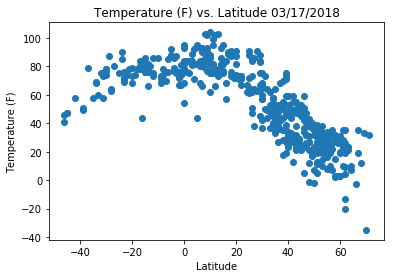

In [10]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

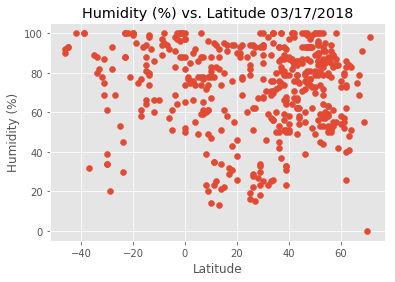

In [11]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

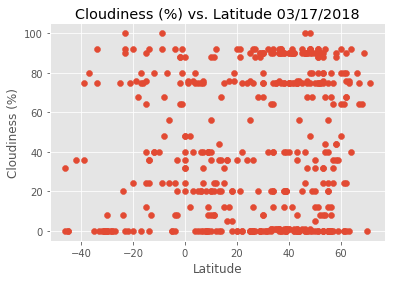

In [12]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

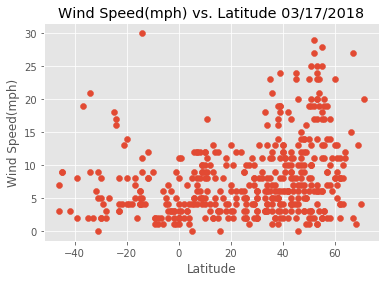

In [13]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [14]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,bechem,gh,7,7,90,61,0,12
1,de-kastri,ru,51,51,13,94,0,7
2,helong,cn,25,25,65,79,56,3
3,tobolsk,ru,58,58,29,87,88,14
4,marsabit,ke,2,2,84,75,48,4
